In [1]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/landlab/landlab/master/notebooks/landlab_header.png", width=700, height=600)


# <span style="color:blue">What is Landlab?</span>  

### Landlab is an open-source Python-language package for numerical modeling of Earth surface dynamics. 
*(From [Landlab read the docs](https://landlab.readthedocs.io/en/latest/index.html))*

## <span style="color:green">Objectives</span> 

*Today we are going to learn about how to use Landlab* **without being a pro in Landlab**. The objectives today are:

1. Understand how landlab save and represent data.
2. Reading a DEM as Landlab grid.
3. Plotting with Landlab and other libraries. 
4. Using basic components: flow accumulator, fastscape eroder and channel profiler.
5. Knowing where to look for more information about Landlab.

## <span style="color:green">Some basics about Landlab</span> 

Landlab contains:

- **Grid** engine to represent and save the data. 
- A library with **components** to apply to your grid.
- Utilities to visualize and support the methods from the components. 

## <span style="color:green">Who is using Landlab?</span>

Landlab was designed for disciplines that quantify Earth surface dynamics such as **geomorphology, hydrology, glaciology, and stratigraphy**. It can also be used in related fields. Scientists who use this type of model often build their **own unique landscape evolution model**. Landlab saves practitioners from the need of the re-invention of basic building blocks by providing standardized components that they can re-use.

# <span style="color:blue">Que es Landlab?</span>  

### Landlab es un paquete en lenguaje de Python, abierto y accesible para el modelamiento numerico de procesos dinamicos de la superficie de la Tierra.  
*(De [Landlab read the docs](https://landlab.readthedocs.io/en/latest/index.html))*

## <span style="color:green">Objetivos</span> 

*Hoy vamos aprender a utilizar Landlab **sin ser un profesional en Landlab**. Los objetivos de hoy son:*

1. Entender como Landlab guarda y representa datos.
2. Leer un DEM como una grilla de Landlab.
3. Plotear con Landlab y otras librerias. 
4. Usar componentes basicos.
5. Saber donde buscar para aprender mas sobre Landlab.

## <span style="color:green">Algunos basicos sobre Landlab</span> 

Landlab contiene:

- **Grilla** para representar y guardar los datos. 
- Una libreria con **componentes** para aplicar sobre tu grilla.
- Herramientas para visualizar y soportar los metodos de los componentes. 

## <span style="color:green">Quien esta usando Landlab?</span>

Landlab fue disenado para disciplinas que cuantifican los processos dinamicos de la superficie de la Tierra, como la **geomorfologia, hidrologia, glaciologia y estratigrafia.** Tambien puede ser usado en otros campos relacionados. Cientificos que usan este tipo de modelos frecuentemente construyen sus propios y unicos modelos de evolucion de paisaje. Landlab libera a sus usuarios de la necesidad de reiventar los bloques basicos para la construccion de sus modelos, proporcionandoles componentes estandar que pueden reutilizar.    


### So, we can all use it! / Entonces, todos nosotros podemos usarlo! 
***

### <span style="color:blue">Ready? / List@s?</span> 

### Let's go! / Vamos!

# Creating a Grid / Creando una grilla

Landlab provides Grid creation and management.
- In a few lines of code you can create a structured or unstructured grid
- You can attach atributes to your grid elements.

*Landlab proporciona la creacion y control de Grillas (Grid).*
- *En unas pocas lineas de codigo puedes crear grillas estructuradas o desestructuradas.*
- *Puedes adjuntar atributos a los elementos de tu grilla.*

With Landlab you can create different types of grids: / *Con Landlab puedes crear diferentes tipos de grillas:*

- Raster
- Hexagonal
- Voronoi
- Radial 

To create a Model Grid we will import the specific one from landlab. / *Para crear un modelo de grilla (Model Grid) vamos a importar la que desees en especifico desde Landlab.* 

In [192]:
import numpy as np
from landlab import RasterModelGrid, VoronoiDelaunayGrid, HexModelGrid

In [193]:
RasterModelGrid?

In [194]:
smg = RasterModelGrid((3, 4), 1.0)  # a square-cell raster, 3 rows x 4 columns, unit spacing
rmg = RasterModelGrid((3, 4), xy_spacing=(1.0, 2.0))  # a rectangular-cell raster
hmg = HexModelGrid(shape=(3, 4))
# ^a hexagonal grid with 3 rows, 4 columns from the base row, & node spacing of 1.
x = np.random.rand(100) * 100.0
y = np.random.rand(100) * 100.0
vmg = VoronoiDelaunayGrid(x, y)
# ^a Voronoi-cell grid with 100 randomly positioned nodes within a 100.x100. square

Each of the grid that we created contains data known as attributes. Let's check what we created. / *Cada grilla que hemos creado contiene datos conocidos como atributos. Veamos que hemos creado.*

In [195]:
print(type(smg))
print(smg)

<class 'landlab.grid.raster.RasterModelGrid'>
<xarray.Dataset>
Dimensions:         (node: 12, link: 17, Two: 2, patch: 6, max_patch_links: 4,
                     cell: 2, face: 7)
Coordinates:
  * node            (node) int64 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: link, Two, patch, max_patch_links, cell, face
Data variables:
    mesh            <U1 'a'
    y_of_node       (node) float64 0.0 0.0 0.0 0.0 1.0 ... 1.0 2.0 2.0 2.0 2.0
    x_of_node       (node) float64 0.0 1.0 2.0 3.0 0.0 ... 3.0 0.0 1.0 2.0 3.0
    nodes_at_link   (link, Two) int64 0 1 1 2 2 3 0 4 1 ... 7 11 8 9 9 10 10 11
    links_at_patch  (patch, max_patch_links) int64 4 7 3 0 5 8 ... 8 13 16 12 9
    node_at_cell    (cell) int64 5 6
    nodes_at_face   (face, Two) int64 1 5 2 6 4 5 5 6 6 7 5 9 6 10


### So, there is nodes and links, x, y coordinates of each nodes and other IDs. 
The links connect the nodes and the patches outline the links. 
### There is also cells that are in the interior of the grid. 
Their edges are the faces and the vertices of the cells are corners. 
### *Entonces, hay nodos, links coordenadas x e y para cada nodo y otros IDs.* 
*Los links conectan los nodos y los patches rodean los links.* 
### *Tambien hay celdas que estan al interior de la grilla.*
*Sus bordes son llamados faces y los vertices de las celdas se llaman corners*

In [196]:
from IPython.display import Image
Image(url= "structures_nodes.png", width=700, height=700)

Now we will attach data to the grid using fields. / *Ahora asociaremos datos a la grilla usando fields.*
- The grids are associated with a type of grid element. / *Las grillas estan asociadas a un grid element.*
- Field are numpy arrays of 1D. / *Los (campos) Field son 1D numpy array*
- Create fields using function add_zeros, add_ones, add_empty or add_field. / *Podemos crear fields usando las funciones add_zeros, add_ones, add_empty, o add_field.*
- field have names! as strings like "elevation", "slope". / *Los campos tienen nombre! en forma de strings, como "elevacion", "pendiente".*



In [197]:
#Checking 
smg.add_zeros?

In [198]:
smg.add_zeros("elevation", at='node', clobber=True)
smg.at_node["elevation"]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [199]:
smg.add_ones("slope", at='link', clobber=True)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [200]:
print(smg.number_of_nodes)
print(smg.number_of_links)

12
17


In [201]:
#We can check the coordinates of each node
for i in range(smg.number_of_nodes):
    print(i, smg.x_of_node[i], smg.y_of_node[i])

0 0.0 0.0
1 1.0 0.0
2 2.0 0.0
3 3.0 0.0
4 0.0 1.0
5 1.0 1.0
6 2.0 1.0
7 3.0 1.0
8 0.0 2.0
9 1.0 2.0
10 2.0 2.0
11 3.0 2.0


Using *Tail* and *Head* at the links we can see the connectivity direction.
To remember this, think of an arrow: TAIL ===> HEAD. 

*Usando Tail y Head en los links podemos ver la direccion de la arista. Para recordar esto piensa en la flecha: TAIL ===> HEAD.*

In [202]:
for i in range(smg.number_of_links):
    print(
        "Link",
        i,
        ":  node",
        smg.node_at_link_tail[i],
        "===> node",
        smg.node_at_link_head[i],
    )

Link 0 :  node 0 ===> node 1
Link 1 :  node 1 ===> node 2
Link 2 :  node 2 ===> node 3
Link 3 :  node 0 ===> node 4
Link 4 :  node 1 ===> node 5
Link 5 :  node 2 ===> node 6
Link 6 :  node 3 ===> node 7
Link 7 :  node 4 ===> node 5
Link 8 :  node 5 ===> node 6
Link 9 :  node 6 ===> node 7
Link 10 :  node 4 ===> node 8
Link 11 :  node 5 ===> node 9
Link 12 :  node 6 ===> node 10
Link 13 :  node 7 ===> node 11
Link 14 :  node 8 ===> node 9
Link 15 :  node 9 ===> node 10
Link 16 :  node 10 ===> node 11


In [203]:
# Other way to add field 
z=10*np.random.rand(smg.number_of_nodes)
smg.add_field('topographic__elevation', z, at='node', clobber=True)
lala=24*np.random.rand(smg.number_of_nodes)
smg.add_field('prueba__loca', lala, at='node', clobber=True)

array([ 14.69722911,  15.83006719,   1.87727325,   5.4970272 ,
        23.34462638,   5.00471417,  12.08376628,  22.85036606,
        11.89323808,  13.22740494,  20.04072521,  20.18345032])

In [204]:
smg.at_node.keys() #what field is attached to the node

['elevation', 'topographic__elevation', 'prueba__loca']

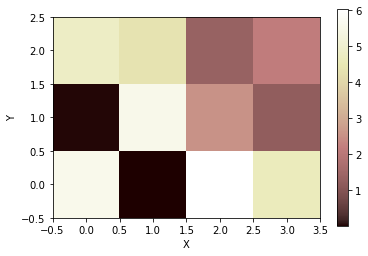

In [205]:
from landlab.plot import imshow_grid # to plot a grid we will use imshow_grid
import matplotlib.pyplot as plt # and our friend matplotlib

imshow_grid(smg,'topographic__elevation') 
plt.show()

In [206]:
smg.add_field?

## Small Excercise (5 min) / *Ejercicio Corto (5 min)*
 - Create a Model Grid and play with the shape and spacing. / *Crea un modelo de grilla y experimenta con la forma y el espacio entre nodos.* 
 - Check the number of nodes and links / *Revisa el numero de nodos y de enlaces.*
 - Attach field to your nodes/links. / *Asocia campos a los nodos/enlaces.*
 - Plot it using imshow_grid( ) / *Graficalos usando imshow_grid( )*


# Reading DEM using Landlab / *Leer DEM usando *Landlab*

To be able to read a Digital Elevation Model (DEM) as a Landlab grid we need it in ASCII Grid format.
We are going to use the example in the folder called `ztopo_1000x500y1.asc` 

*Para poder leer un Modelo Digital de Elevacion (DEM) como una grilla de Landlab lo necesitamos en formato ASCII. Vamos a usar el ejemplo que esta en la carpeta llamado `ztopo_1000x500y1.asc`*

The example DEM is from the work of Reitman et al., 2019 in models of strike-slip faults / *El DEM de ejemplo es del trabajo de Reitman et al., 2019 en models of strike-faults*

### The function that we will use is read_esri_ascii, but let's see how the file looks like. / *La funcion que usaremos es read_esri_ascii, pero veamos como se ve el archivo

In [257]:
from landlab.io import read_asc_header

fop = open("ztopo_1000x500y1.asc", "r")
hdr = read_asc_header(fop)
hdr

{'nrows': 500,
 'cellsize': 1.0,
 'xllcorner': 0.0,
 'ncols': 1000,
 'yllcorner': 0.0}

In [258]:
from landlab.io import read_esri_ascii

In [259]:
# Look at the documentation
read_esri_ascii?

In [281]:
(mg, z) = read_esri_ascii("ztopo_1000x500y1.asc", name="topographic__elevation")

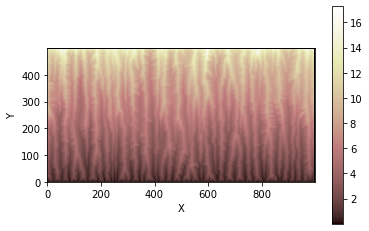

In [294]:
# Veamos que creamos usando imshow_grid
imshow_grid(mg,'topographic__elevation')
plt.show()

wuhuu! We can see the topography of this area that show higher elevation ridges and lower elevation channels! Let's explore a bit of the grid info.

*wuhuu! podemos ver la topografia de esta area que muestra crestas elevadas y canales de baja elevacion! Vamos a explorar un poco de la informacion de la grilla.*

In [295]:
mg.number_of_node_rows

500

In [296]:
mg.number_of_node_columns

1000

In [297]:
print(mg)

<xarray.Dataset>
Dimensions:         (node: 500000, link: 998500, Two: 2, patch: 498501,
                     max_patch_links: 4, cell: 497004, face: 995504)
Coordinates:
  * node            (node) int64 0 1 2 3 4 ... 499996 499997 499998 499999
Dimensions without coordinates: link, Two, patch, max_patch_links, cell, face
Data variables:
    mesh            <U1 'a'
    y_of_node       (node) float64 0.0 0.0 0.0 0.0 ... 499.0 499.0 499.0 499.0
    x_of_node       (node) float64 0.0 1.0 2.0 3.0 ... 996.0 997.0 998.0 999.0
    nodes_at_link   (link, Two) int64 0 1 1 2 2 ... 499997 499998 499998 499999
    links_at_patch  (patch, max_patch_links) int64 1000 1999 ... 997499 996500
    node_at_cell    (cell) int64 1001 1002 1003 1004 ... 498996 498997 498998
    nodes_at_face   (face, Two) int64 1 1001 2 1002 ... 499997 498998 499998


# Plotting in 2D / *Graficando en 2D*

You have already use **imshow_grid**. This is the primary function for plotting data in Landlab. As you can imagine there are more options to control the appearance of your output. Let's see the documentation.

*Ya haz usado **imshow_grid** anteriormente. Esta es la funcion primaria para graficar datos en Landlab. Como podras imaginar esta tiene mas opciones para controlar su apariencia. Veamos la documentacion.*

In [298]:
help(imshow_grid)

Help on function imshow_grid in module landlab.plot.imshow:

imshow_grid(grid, values, **kwds)
    imshow_grid(grid, values, plot_name=None, var_name=None, var_units=None,
    grid_units=None, symmetric_cbar=False, cmap='pink', limits=(values.min(),
    values.max()), vmin=values.min(), vmax=values.max(), allow_colorbar=True,
    colorbar_label=None, norm=[linear], shrink=1., color_for_closed='black',
    show_elements=False, color_for_background=None)
    
    Prepare a map view of data over all nodes or cells in the grid.
    
    Data is plotted as colored cells. If at='node', the surrounding cell is
    shaded with the value at the node at its center. If at='cell', the cell
    is shaded with its own value. Outer edges of perimeter cells are
    extrapolated. Closed elements are colored uniformly (default black,
    overridden with kwd 'color_for_closed'); other open boundary nodes get
    their actual values.
    
    *values* can be a field name, a regular array, or a masked arra

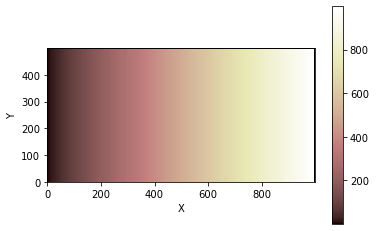

In [299]:
# Let's plot the x distances at nodes
imshow_grid(mg, mg.x_of_node)
plt.show()

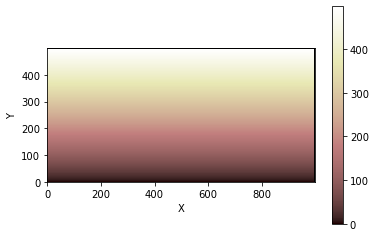

In [300]:
# Let's plot the x distances at nodes
imshow_grid(mg, mg.y_of_node)
plt.show()

Let's change the color based on colomap references like [matplotlib color references](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html)

/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:454: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color=color_for_closed)


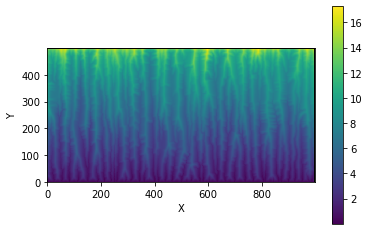

In [302]:
imshow_grid(mg,'topographic__elevation', cmap='viridis')
plt.show()

Explore by your own some other colors and the documentation of **imgrid_show.**

*Explora otros colores y la documentacion de **imgrid_show**.*

## *Break 5 min* 

# Using the components / *Usando componentes*

Today we will explore two components: Flow accumulator and Channel Profiler. 

- **[FlowAccumulator](https://landlab.readthedocs.io/en/latest/reference/components/flow_accum.html?highlight=flow%20accumulator):** 
Component to accumulate flow and calculate drainage area.
Provides the FlowAccumulator component which accumulates flow and calculates drainage area. FlowAccumulator supports multiple methods for calculating flow direction. Optionally a depression finding component can be specified and flow directing, depression finding, and flow routing can all be accomplished together.
- **[ChannelProfiler](https://landlab.readthedocs.io/en/latest/reference/components/channel_profiler.html?highlight=Channel%20profiler):** Create and plot channel profiles.

*Hoy exploraremos dos componentes: Flow accumulator y Channel Profiler.*

- **[FlowAccumulator](https://landlab.readthedocs.io/en/latest/reference/components/flow_accum.html?highlight=flow%20accumulator):** 
Componente para acumular flujo y calcular area de drenaje.
Provee la componente FlowAccumulator la cual acumula el flujo y calcula el area de denaje. FlowAccumulator soporta multiples metodos para calcular la direccion del flujo. Opcionalmente una componente para encontrar depresiones puede ser especificada y de este modo la direccion del flujo, encontrar depresiones, y la ruta del flujo pueden ser todas encontradas juntas
- **[ChannelProfiler](https://landlab.readthedocs.io/en/latest/reference/components/channel_profiler.html?highlight=Channel%20profiler):** Crea y grafica perfiles de canales.


In [326]:
help(FlowAccumulator)

Help on class FlowAccumulator in module landlab.components.flow_accum.flow_accumulator:

class FlowAccumulator(landlab.core.model_component.Component)
 |  FlowAccumulator(*args, **kwds)
 |  
 |  Component to accumulate flow and calculate drainage area.
 |  
 |  This is accomplished by first finding flow directions by a user-specified
 |  method and then calculating the drainage area and discharge.
 |  
 |  Optionally, spatially variable runoff can be set either by the model grid
 |  field 'water__unit_flux_in' or the input variable *runoff_rate**.
 |  
 |  Optionally a depression finding component can be specified and flow
 |  directing, depression finding, and flow routing can all be accomplished
 |  together.
 |  
 |  NOTE: The perimeter nodes  NEVER contribute to the accumulating flux, even
 |  if the  gradients from them point inwards to the main body of the grid.
 |  This is because under Landlab definitions, perimeter nodes lack cells, so
 |  cannot accumulate any discharge.
 |  

In [327]:
from landlab.components import ChannelProfiler, FlowAccumulator

(mg, z) = read_esri_ascii("ztopo_1000x500y1.asc", name="topographic__elevation")

#Run Flow Accumulator using defaults 
fr = FlowAccumulator(mg)
fr.run_one_step()

Let's see what happened... Flow Accumulator has the property `surface_values` that stores the values of the surface over which flow is directed and accumulated. 

*Veamos que pasa... Flow Accumulator tiene la propiedad `surface_values` que guarda los valores de la superficie sobre la cual el flujo es dirijido y acumulado.*

In [330]:
fr.surface_values

array([  8.29525445e-02,   7.87390617e-03,   2.21894884e-02, ...,
         1.50012049e+01,   1.50141980e+01,   1.50263126e+01])

### Now that we know where water is accumulating, let's see the drainage networks using ChannelProfiler / *Ahora que sabemos donde se acumula el agua, veamos las redes de drenaje usando ChannelProfiler.*

In [333]:
help(ChannelProfiler)

Help on class ChannelProfiler in module landlab.components.profiler.channel_profiler:

class ChannelProfiler(landlab.components.profiler.base_profiler._BaseProfiler)
 |  ChannelProfiler(*args, **kwds)
 |  
 |  Extract and plot the channel profiles in drainage networks.
 |  
 |  The ChannelProfiler extracts channel networks from a landlab grid.
 |  
 |  In order to extract channel networks, the flow connectivity across the grid
 |  must already be identified. This is typically done with the FlowAccumulator
 |  component. However, this component does not require that the
 |  FlowAccumulator was used. Instead it expects that the following at-node
 |  grid fields will be present:
 |  ::
 |  
 |      'flow__receiver_node'
 |      'flow__link_to_receiver_node'
 |  
 |  The ChannelProfiler can work on grids that have used route-to-one or
 |  route-to-multiple flow directing.
 |  
 |  To understand how this component works it is useful to define the following
 |  terms: *watershed*, *outlet*, 

/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:454: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color=color_for_closed)
/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:494: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


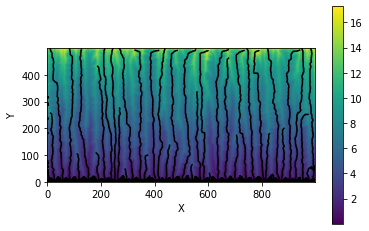

In [335]:
# Plot channel profiles
profiler = ChannelProfiler(mg, number_of_watersheds = 800)
profiler.run_one_step()
            
imshow_grid(mg,"topographic__elevation", cmap='viridis')

riv_nodes = profiler.nodes

for i in range(len(riv_nodes)):
            
    riv_x = mg.x_of_node[riv_nodes[i]]
    riv_y = mg.y_of_node[riv_nodes[i]]

    plt.plot(riv_x,riv_y,color='black')

/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:454: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("terrain"))
  cmap.set_bad(color=color_for_closed)
/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:494: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


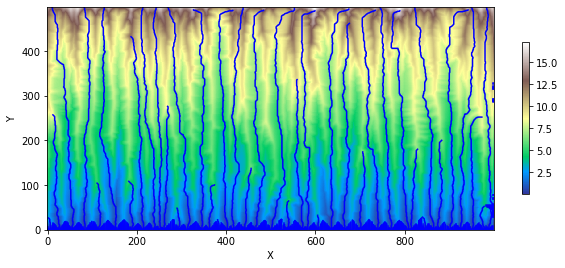

In [338]:
#To make it bigger:
figsize = [10,8] # size of grid plots
shrink = 0.35 
fig = plt.figure(figsize=figsize)

imshow_grid(mg,"topographic__elevation", cmap='terrain', shrink=shrink)

riv_nodes = profiler.nodes

for i in range(len(riv_nodes)):
            
    riv_x = mg.x_of_node[riv_nodes[i]]
    riv_y = mg.y_of_node[riv_nodes[i]]

    plt.plot(riv_x,riv_y,color='blue')

## What happens if we have changes on time? / *Que pasa si tenemos cambios en el tiempo?*

Let's see a `for` loop for uplift first. / *Veamos un bucle `for` para el levantamiento primero*

In [339]:
total_t= 30000.0 #years
dt= 500 #time step
nt= int(total_t // dt) # number of steps

uplift_rate= 0.001 #m/yr
uplift_per_step= uplift_rate*dt #Depth m of uplift per time step

In [344]:
for i in range(nt):
    fr.run_one_step() #ruta del flujo
    mg.at_node['topographic__elevation'][mg.core_nodes] += uplift_per_step #agregando alzamiento en cada salto
    
    if i%20 == 0:
        print ("Completed loop", i, "out of", nt) #para contabilizar como va el for loop

Completed loop 0 out of 60
Completed loop 20 out of 60
Completed loop 40 out of 60


/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:454: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("terrain"))
  cmap.set_bad(color=color_for_closed)
/Users/taranguiz/opt/anaconda3/lib/python3.8/site-packages/landlab/plot/imshow.py:494: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


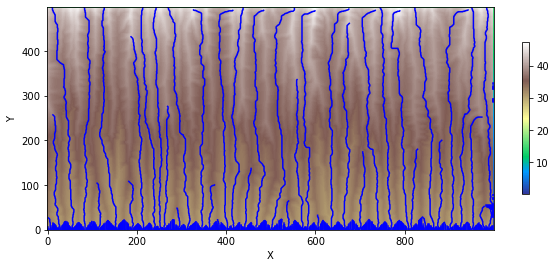

In [343]:
#To make it bigger:
figsize = [10,8] # size of grid plots
shrink = 0.35 
fig = plt.figure(figsize=figsize)

imshow_grid(mg,"topographic__elevation", cmap='terrain', shrink=shrink)

riv_nodes = profiler.nodes

for i in range(len(riv_nodes)):
            
    riv_x = mg.x_of_node[riv_nodes[i]]
    riv_y = mg.y_of_node[riv_nodes[i]]

    plt.plot(riv_x,riv_y,color='blue')

We can see higher elevation values because we added uplift to the nodes! But the reality includes other surface processes...

*Podemos ver elevaciones mas altas porque agregamos nuestros valores de levantamiento a los nodos! Pero en la realidad hay otros procesos de la superficie...*

## What happens if we add Linear Diffusion? / Que pasa si agregamos Difusion lineal?

- There is a component called [LinearDiffuser](https://landlab.readthedocs.io/en/master/reference/components/diffusion.html) that models soil creep using “linear diffusion” transport law (no depth dependence).

- This is a component that depends on time and requires a dt (jump in time) inside a for loop (Just how we did using uplift).

Check it out!

- *Hay una componente llamada [LinearDiffuser](https://landlab.readthedocs.io/en/master/reference/components/diffusion.html) que modela los cambios en el suelo usando la " ley de diffusion lineal" (sin dependencia de la profundidad).*

- *Esta es una componente que depende del tiempo y require un dt (salto de tiempo) dentro de un bucle for (de forma similar a la que hicimos el levantamiento).*

*Echale un ojo!*

***

# Homework 1

- Your homework is to do some research about the Lineardiffuser component to model soil creeping. Use the same dt time steps that we used with the uplift and do not forget about including both processes inside of the loop. Plot to visualize the changes in the topography. 

- *Tu tarea sera averiguar como utilizar el componente LinearDiffuser para modelar soil creeping en las laderas de nuestro DEM. Utiliza los mismos valores de tiempo dt que usamos para uplift y no olvides incluir tanto la diffusion como el alzamiento dentro del loop. Luego plotea tu nueva grilla para visualizar los cambios.* 

HINT: Instantiate `linear_diffuser` and define its parameters (diffusivity=1) before the `for` loop. / *Crea una instacia de `linear_diffuser` y define sus parametros (diffusivity=1) antes del bucle `for`.*


# Homework 2

- For those motivated with Landlab your second part of the homework will be adding the erosion in the channels assuming the stream power erosion. The component that represents this in Landlab is [FastscapeEroder](https://landlab.readthedocs.io/en/master/reference/components/stream_power.html?highlight=fastscape).

Look at the parameters that the component needs to work and define them before running the for loop.

The process is very similar to the homework 1 and you will add the FastEroder to the landscape evolution.

Visualize the results using **imshow_grid.**

- *Para aquellos motivados con Landlab, su segunda parte de la tarea sera agregar la erosion en los canales asumiendo la erosion causada por las corrientes. La componente que representa esto en Landlab se llama [FastscapeEroder](https://landlab.readthedocs.io/en/master/reference/components/stream_power.html?highlight=fastscape).*

*Mira los parametros que la componente nesecita para funcionar y definelos antes de correr el bucle `for`.*

*Este proceso es bastante similar al de la parte 1 y tendras que agregar el FastEroder a la evolucion del paisaje.*

*Visualiza los resultados usando **imshow_grid.***




## Check this resources / *Revisa estos recursos*:
- [Landlab Documentation](https://landlab.readthedocs.io/en/master/index.html)
- [Landlab Github](https://github.com/landlab/landlab)
- [Landlab Notebooks Tutorials](https://github.com/landlab/landlab/tree/master/notebooks/tutorials)
- [Workshop and Clinics](https://github.com/landlab/General-Landlab-Clinic-2020-21): There's a helful notebook for your HW. / *hay un notebook muy util para la tarea.*

## Agradecimientos y creditos:

El material aqui utilizado fue tomado y modificado de las fuentes recien mencionadas. El equipo de Landlab y sus colaboradores han creado multiples fuentes de informacion de libre acceso tanto para investigacion como recursos educativos. 

#### Thanks in particular to Mark Piper and Nicole Gasparini, two of our CoCo leaders that have been developing this incredible package. 